
TC Grace
Number of crl files: 9

TC Grace, 08-17, Eye Pass 1
TC Grace, 08-17, Eye Pass 2
TC Grace, 08-17, Eye Pass 3
TC Grace, 08-18, Eye Pass 1
TC Grace, 08-18, Eye Pass 2
TC Grace, 08-18, Eye Pass 3
TC Grace, 08-19, Eye Pass 1
TC Grace, 08-19, Eye Pass 2
TC Grace, 08-19, Eye Pass 3

TC Henri
Number of crl files: 5

TC Henri, 08-20, Eye Pass 1
TC Henri, 08-20, Eye Pass 3
TC Henri, 08-21, Eye Pass 1
TC Henri, 08-21, Eye Pass 2
TC Henri, 08-21, Eye Pass 3

TC Ida
Number of crl files: 4

TC Ida, 08-27, Eye Pass 1
TC Ida, 08-27, Eye Pass 2
TC Ida, 08-27, Eye Pass 7
TC Ida, 08-29, Eye Pass 2

TC Sam
Number of crl files: 7

TC Sam, 09-26, Eye Pass 1
TC Sam, 09-26, Eye Pass 2
TC Sam, 09-26, Eye Pass 3
TC Sam, 09-27, Eye Pass 2
TC Sam, 09-27, Eye Pass 3
TC Sam, 09-29, Eye Pass 1
TC Sam, 09-29, Eye Pass 2
The tropical depression case hasn't yet been added!


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


tropical-storms figure created.


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


weak-hurricanes figure created.


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


strong-hurricanes figure created.


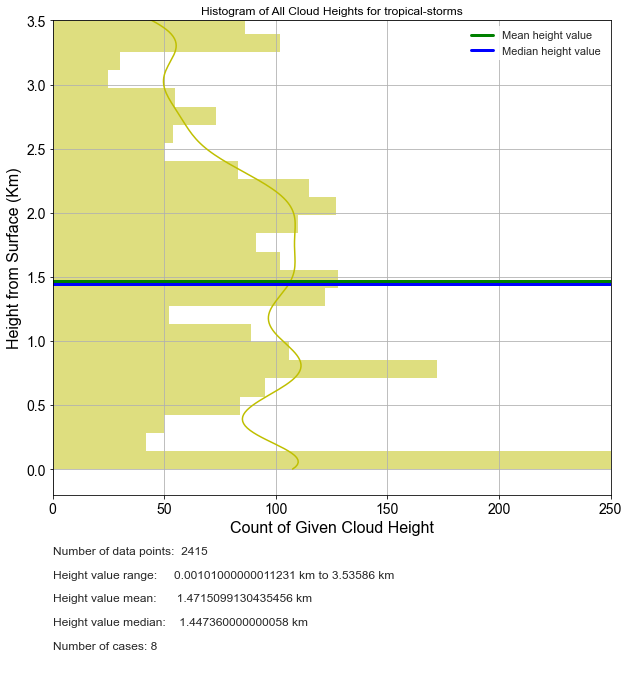

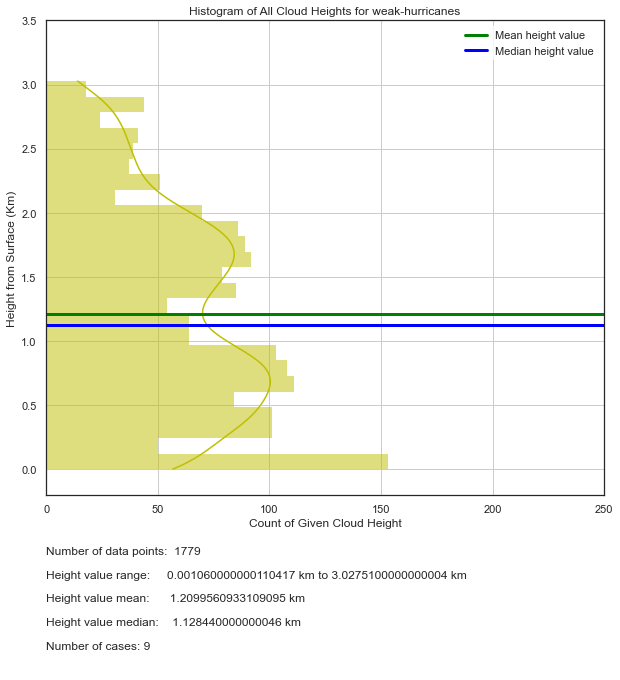

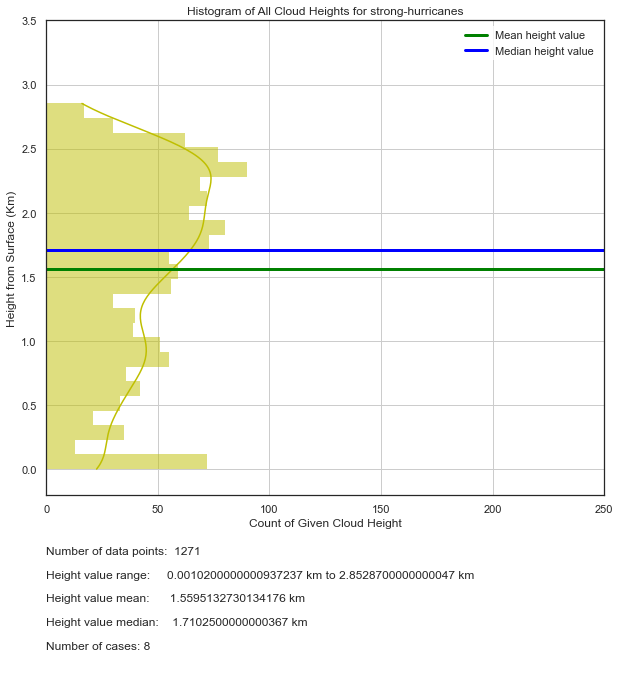

In [2]:
# new methods! 

import os
os.chdir( '/Users/etmu9498/research/code/scripts/statistics')
import cloud_height_pdfs_in_situ

# old cloud top for each pass script
# cloud_height_pdfs.pdf_all_tc_eyes(tc='all')

# new cloud top for each pass script
# cloud_height_pdfs_in_situ.pdf_all_tc_eyes(tc='all')

# new statistics on number of cloud layers per pass!
# cloud_height_pdfs_in_situ.number_of_layers(tc='all')

# new script to look at cloud height breakdowns based on intensity!
cloud_height_pdfs_in_situ.cloud_height_vs_intensity()

In [6]:
# testing intensity category finder metadata + script
import os
os.chdir( "/Users/etmu9498/research/code/scripts")
import tc_metadata

data = tc_metadata.all_data(tc='henri')
data['intensity_cat']

['ts', 'ts', 'wh', 'wh', 'wh']

In [ ]:
import os
os.chdir( "/Users/etmu9498/research/data/crl-new-matrices")
import xarray
a = xarray.open_dataset( "crl-grace-08-18-eye-1.nc")
a

In [ ]:
# older methods

# this cell will run everything necessary to auto create a tc eye!

import os
os.chdir(  "/Users/etmu9498/research/code/scripts")
from ct_statistics_V1 import one_tc_eye
import make_plots

# load crl data:
crl_path = "/Users/etmu9498/research/data/CRL_data/2021/"
crl_list = make_plots.load_crl( crl_path, print_files=False)
crl_name = crl_list[ 16]
i1 = 2350 # 0
i2 = 3800 # 2000

# look at longitude for this eye
xaxis='lon'
cutoff_power = -30

# load tdr data
tdr_path = "/Users/etmu9498/research/data/tdr/sam/nc-files"
tdr_list = make_plots.load_tdr( tdr_path, print_files=True)
inbound_name = tdr_list[2]
outbound_name = tdr_list[3]

# run the script!
one_tc_eye( crl_path, crl_name, tdr_path, inbound_name, outbound_name, xaxis, cutoff_power, i1, i2 )

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr

os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots
import eyewall_slope
import cloud_height
import eyewall_slope_auto

import tc_metadata

In [ ]:
# load data:
crl_path = "/Users/etmu9498/research/data/CRL_data/2021/"
crl_list = make_plots.load_crl( crl_path, print_files=False)
crl_name = crl_list[ 16]

os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)

i1 = 0
i2 = 2000
# look at longitude for this eye
xaxis='lon'
cutoff_power = -30

tdr_path = "/Users/etmu9498/research/data/tdr/sam/nc-files"
tdr_list = make_plots.load_tdr( tdr_path, print_files=True)
inbound_name = tdr_list[0]
outbound_name = tdr_list[1]


In [ ]:
# cut data to fit eyewall edges determined by eyewall_slope.py function
in_x_start, out_x_start, in_H_start, out_H_start = eyewall_slope.eyewall_start( tdr_path, inbound_name, outbound_name, xaxis)

print( in_x_start.values)
print( out_x_start.values)

lon = crl_data.Lon.values[i1:i2]

crl_lower_lim = min( lon, key= lambda list_value : abs(list_value - in_x_start))
print( crl_lower_lim)
crl_upper_lim = min( lon, key= lambda list_value : abs(list_value - out_x_start))
print( crl_upper_lim)

# index_closest_value = lon.index( closest_value)
crl_lower_lim_i = np.where( lon == crl_lower_lim)
crl_upper_lim_i = np.where( lon == crl_upper_lim)
print( len( lon))

# redefine i1 and i2 to crop down to tc eye size!
i1 = crl_lower_lim_i[0][0]
i2 = crl_upper_lim_i[0][0]
print( i1)
print( i2)


# load cloud height data
H, xaxis_value = cloud_height.find_cloud_heights(crl_name, cutoff_power, i1, i2, xaxis = xaxis)

In [ ]:
# quickly visualizing this dataset
plt.figure( figsize=(18, 5))
make_plots.plot_power_ch1( crl_path, crl_name, i1, i2, xaxis)

plt.scatter( xaxis_value, H, c= 'r', s=8, marker='s')
plt.plot( xaxis_value, H, c=  'r', linewidth=1, label= 'Cloud Top Height')
plt.xlabel( 'Time (UTC, Hours)')
plt.title( "TC Sam, 09/26/22, Eye 1, CRL Backscattered Power and Cloud Top Heights")

plt.scatter( in_x_start, 3.0, c='r')

# plt.xlim( [22.6, 22.65])
# plt.xlim( [-50.7, -50.4])

In [ ]:
# print out some basic stats from the height dataset

print( "Number of data points:  " + str( i2 - i1))
print( "Height value range:     " + str( H.min().values) + " km to " + str( H.max().values) + " km")
print( "Height value mean:      " + str( H.mean().values) + " km")
print( "Height value median:    " + str( H.median().values) + " km")


In [ ]:
# view simple histogram of cloud top heights!

# **** see radiative transfer class, lab 1 or something, for how to make a histogram with a curved line superimposed
#      over the points! You need to use another library, not matplotlib ****

nbins = 15 # number of bins

plt.figure( figsize=( 10, 8))
plt.hist( H, nbins, density=True, facecolor='c', histtype = 'bar') # 'bar', 'barstacked', 'step', 'stepfilled'
plt.axvline( x=H.mean(), c='g', label="Mean height value", linewidth=3)

plt.ylabel( 'Probability of a Given Height Occurence')
plt.xlabel( 'Height from Surface (Km)')
plt.title( "TC Sam, 09/26/22, Eye 1, Cloud Top Height Histogram")
plt.grid(True)
plt.legend()